# Outlier

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\covid_toy.csv")
dataset.head(5)

,age,gender,fever,cough,city,has_covid
0,60,Male,350.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,NaN
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     98 non-null     object 
 2   fever      90 non-null     float64
 3   cough      97 non-null     object 
 4   city       97 non-null     object 
 5   has_covid  99 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [52]:
dataset.describe()

,age,fever
count,100.000000,90.000000
mean,50.340000,104.700000
std,36.723158,32.894947
min,5.000000,55.000000
25%,21.500000,99.000000
50%,47.500000,101.000000
75%,69.250000,102.750000
max,200.000000,350.000000


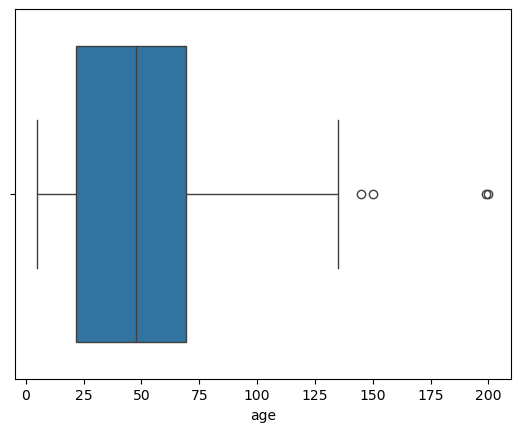

In [48]:
sns.boxplot(x="age",data=dataset)
plt.show()

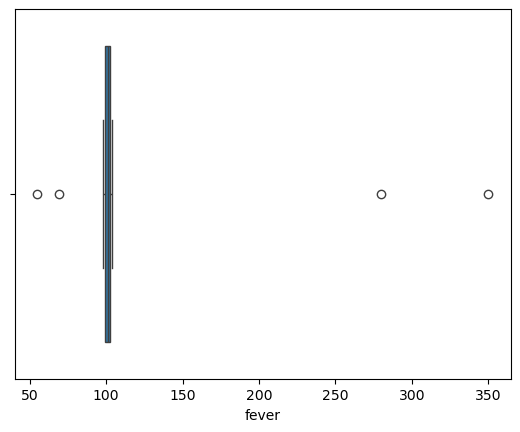

In [50]:
sns.boxplot(x="fever",data=dataset)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19676\2153789862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"])


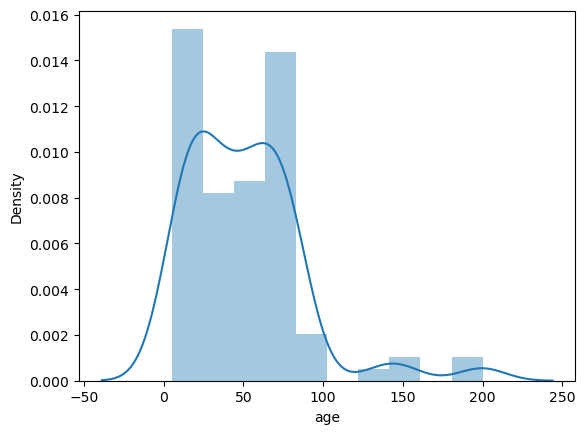

In [54]:
sns.distplot(dataset["age"])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19676\3818187547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["fever"])


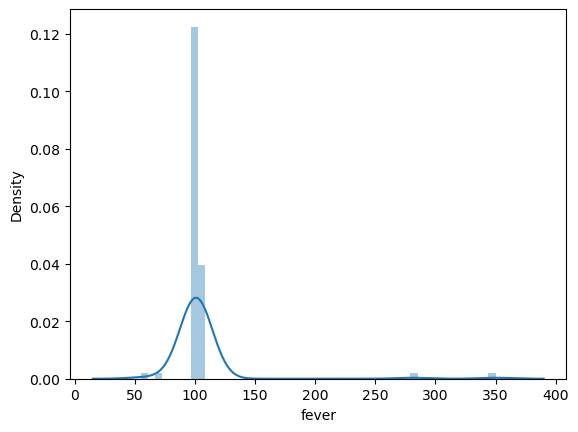

In [56]:
sns.distplot(dataset["fever"])
plt.show()

In [58]:
s=[5,6,8,6,5,6,4]
sum(s)/len(s)

5.714285714285714

In [60]:
s=[5,6,8,6,5,6,400]
sum(s)/len(s)

62.285714285714285

# Outlier Removal Using IQR

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\covid_toy.csv")
dataset.head(5)

,age,gender,fever,cough,city,has_covid
0,60,Male,350.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,NaN
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [67]:
dataset.describe()

,age,fever
count,100.000000,90.000000
mean,50.340000,104.700000
std,36.723158,32.894947
min,5.000000,55.000000
25%,21.500000,99.000000
50%,47.500000,101.000000
75%,69.250000,102.750000
max,200.000000,350.000000


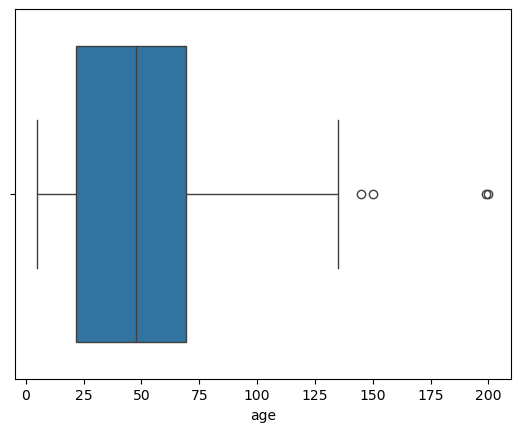

In [69]:
sns.boxplot(x="age",data=dataset)
plt.show()

The full form of IQR is Interquartile Range.



* Q1==>25th percentile
* Q3==>75th percentile
* IQR=Q3-Q1

* min=Q1-(1.5*IQR)


* max=Q3+(1.5*IQR)

* if koi data min se kam or max se jyada honge use OUTlier kahte hai

In [79]:
dataset.shape

(100, 6)

In [81]:
Q1=dataset["age"].quantile(0.25)
Q1

21.5

In [83]:
Q3=dataset["age"].quantile(0.75)
Q3

69.25

In [85]:
IQR=Q3-Q1
IQR

47.75

In [89]:
min_range=Q1-(1.5*IQR)
max_range=Q3+(1.5*IQR)
min_range,max_range


(-50.125, 140.875)

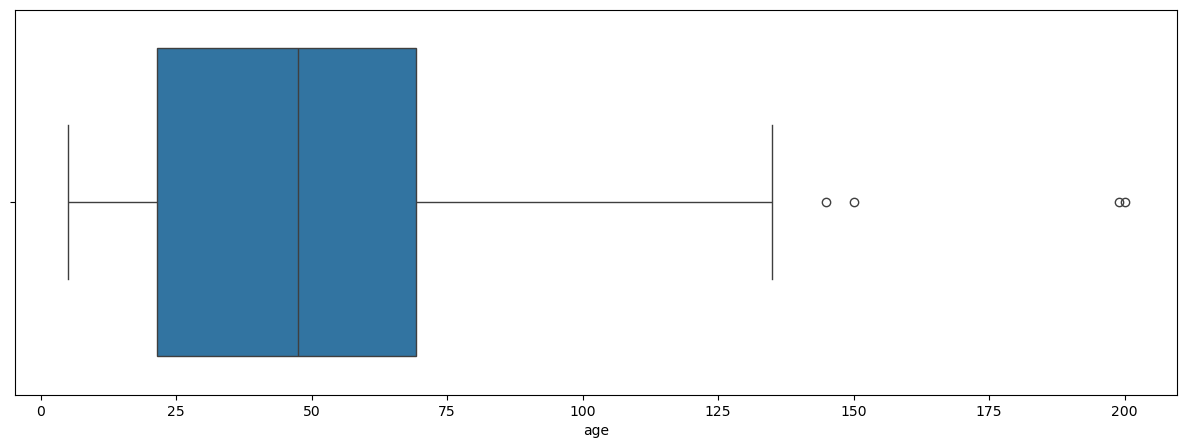

In [91]:
plt.figure(figsize=(15,5))
sns.boxplot(x="age",data=dataset)
plt.show()

In [93]:
new_dataset=dataset[dataset["age"]<=max_range]

In [97]:
new_dataset.shape

(96, 6)

In [99]:
dataset.shape

(100, 6)

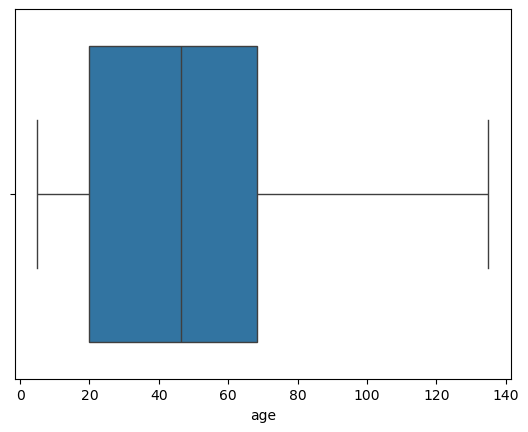

In [103]:
sns.boxplot(x="age",data=new_dataset)
plt.show()
# ab esme koi outlier nhi hai

# Outlier Removal using Z Score

In [114]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
dataset=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\covid_toy.csv")
dataset.head(5)

,age,gender,fever,cough,city,has_covid
0,60,Male,350.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,NaN
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [110]:
dataset.isnull().sum()

age           0
gender        2
fever        10
cough         3
city          3
has_covid     1
dtype: int64

In [112]:
dataset.describe()

,age,fever
count,100.000000,90.000000
mean,50.340000,104.700000
std,36.723158,32.894947
min,5.000000,55.000000
25%,21.500000,99.000000
50%,47.500000,101.000000
75%,69.250000,102.750000
max,200.000000,350.000000


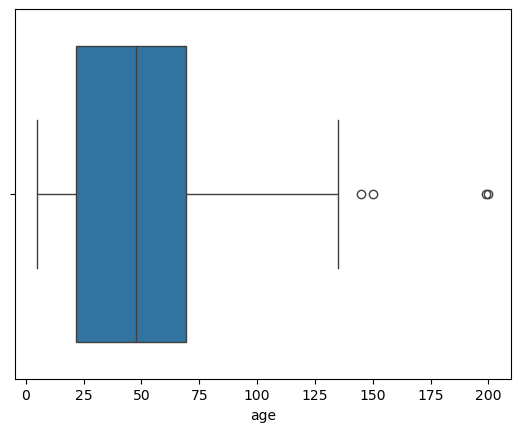

In [116]:
sns.boxplot(x="age",data=dataset)
plt.show()

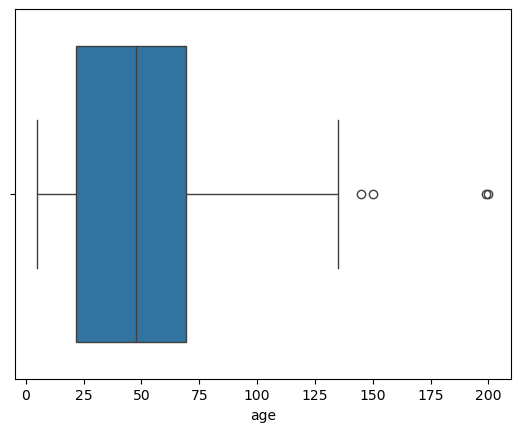

In [120]:
sns.boxplot(x=dataset["age"])
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19676\945655658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"])


<Axes: xlabel='age', ylabel='Density'>

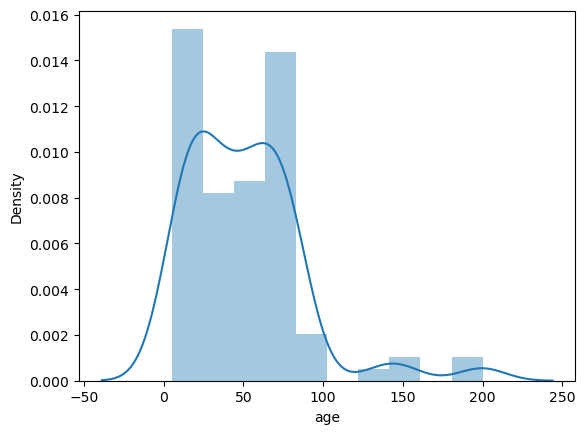

In [122]:
sns.distplot(dataset["age"])

In [126]:
min_range=dataset["age"].mean()-(3*dataset["age"].std())
max_range=dataset["age"].mean()+(3*dataset["age"].std())
min_range,max_range

(-59.829472755717276, 160.5094727557173)

In [135]:
newdata=dataset[dataset["age"]<=max_range]
newdata

,age,gender,fever,cough,city,has_covid
0,60,Male,350.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,NaN
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,55.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [158]:
newdata.shape

(98, 6)

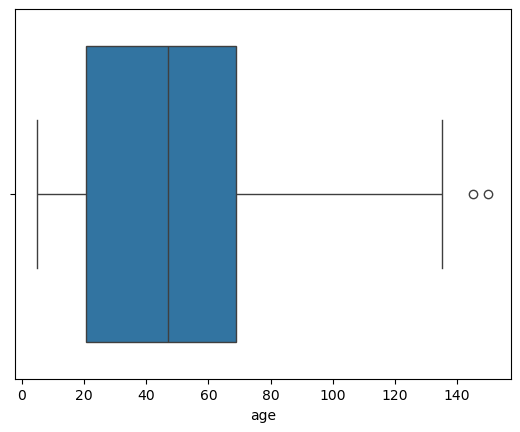

In [139]:
sns.boxplot(x=newdata["age"])
plt.show()

# Z-Score

In [162]:
# z=x-mean/std
# z=x-u/sigma

In [142]:
z_score=(dataset["age"]-dataset["age"].mean())/(dataset["age"].std())

In [144]:
z_score

0     0.263049
1    -0.635566
2    -0.227105
3    -0.526643
4     0.399203
        ...   
95   -1.044028
96    0.017972
97   -0.826182
98   -1.234643
99   -1.098489
Name: age, Length: 100, dtype: float64

In [152]:
dataset["z_score" ]=z_score
# hmare data set me nya column add ho jayga

In [154]:
dataset

,age,gender,fever,cough,city,has_covid,z_score
0,60,Male,350.0,Mild,Kolkata,No,0.263049
1,27,Male,100.0,Mild,Delhi,NaN,-0.635566
2,42,Male,101.0,Mild,Delhi,No,-0.227105
3,31,Female,98.0,Mild,Kolkata,No,-0.526643
4,65,Female,101.0,Mild,Mumbai,No,0.399203
...,...,...,...,...,...,...,...
95,12,Female,55.0,Mild,Bangalore,No,-1.044028
96,51,Female,101.0,Strong,Kolkata,Yes,0.017972
97,20,Female,101.0,Mild,Bangalore,No,-0.826182
98,5,Female,98.0,Strong,Mumbai,No,-1.234643


In [156]:
dataset[dataset["z_score"]<3]

,age,gender,fever,cough,city,has_covid,z_score
0,60,Male,350.0,Mild,Kolkata,No,0.263049
1,27,Male,100.0,Mild,Delhi,NaN,-0.635566
2,42,Male,101.0,Mild,Delhi,No,-0.227105
3,31,Female,98.0,Mild,Kolkata,No,-0.526643
4,65,Female,101.0,Mild,Mumbai,No,0.399203
...,...,...,...,...,...,...,...
95,12,Female,55.0,Mild,Bangalore,No,-1.044028
96,51,Female,101.0,Strong,Kolkata,Yes,0.017972
97,20,Female,101.0,Mild,Bangalore,No,-0.826182
98,5,Female,98.0,Strong,Mumbai,No,-1.234643


In [160]:
# eski row =newdata
# its mean saare method same answer dete hai